In [1]:
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageFilter
from os import listdir

/home/aimee/App/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten

### Load images

In [3]:
TRAIN_FILE = "../Train/"
img_files = listdir(TRAIN_FILE )

In [4]:
#Load images
pil_img = [Image.open(TRAIN_FILE + img) for img in img_files if img.endswith(".bmp")]
#Only consider the luminance channel (YCrCb)
ycbcr = [image.convert('YCbCr') for image in pil_img]


In [5]:
#Display images
def print_luminance(img) :
    plt.imshow(img[:,:,0], cmap=plt.get_cmap('gray'), interpolation='nearest')

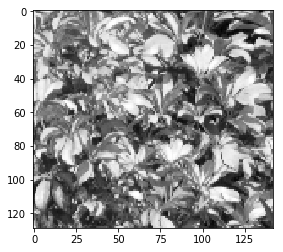

In [6]:
#Convert images to numpy array
imgs = [np.asarray(image) for image in ycbcr]
imgs[10].shape
print_luminance(imgs[1])

### Generate train and test set
In the training phase, the ground truth images {Xi } are prepared as 32 × 32-
sub-images. To synthesize the low-resolution samples {Yi}, we blur a sub-image by a proper Gaussian kernel, sub-sample it by the upscaling factor, and upscale it by the same factor via bicubic interpolation. 
The sub-images are extracted from original images with a stride of 14.

In [7]:
#Default values, 33 is chossen to allow division by 3
sample_size = 33;
# No borders efects, we'll validate only the center of the image
label_size = 21;
scale = 3;
stride = 14;

In [8]:
samples = []
labels = []
padding = int(abs(sample_size - label_size)/2);
count = 0;


In [9]:
%run utility.py

<Figure size 432x288 with 0 Axes>

In [10]:
count = 0
for img in imgs :
    label = modcrop(img, scale)
    height, width = getSize(label)
    sample = bicubicInterpolation(label, 1/3, (height,width))
    
    #Calculate subimages
    for h in range(0, height - sample_size, stride ) :
        for w in range(0, width - sample_size, stride) :
            sub_img = sample[h : h + sample_size - 1, w : w + sample_size - 1, :]
            sub_label = label[h + padding : h + padding + label_size - 1, w + padding : w +  padding + label_size - 1, :]
            
            count = count + 1
            samples.append(sub_img)
            labels.append(sub_label)

#### Original image and bicubic interpolated image

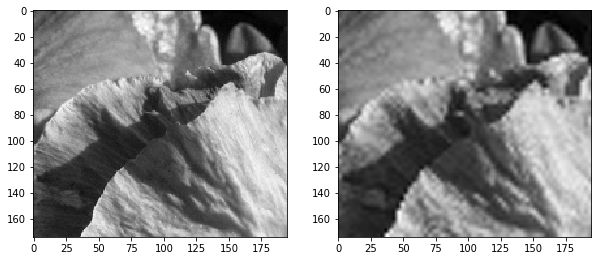

In [11]:
label = modcrop(imgs[0], scale)
h, w = getSize(label)
sample = bicubicInterpolation(label, 1/3, (h,w))

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
print_luminance(label)
getSize(label)
plt.subplot(122)
print_luminance(sample)

plt.show()


In [12]:
## Verify all images have the same size

samples_size = [s for s in samples if s.shape != (32, 32, 3)]
assert len(samples_size) == 0
labels_size = [s for s in labels if s.shape != (20, 20, 3)]
assert len(labels_size) == 0
count

21712

#### Example of our train and test set images

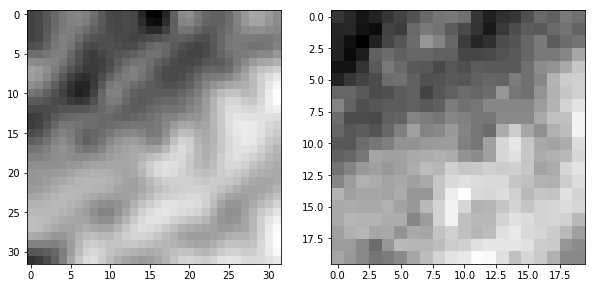

In [13]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
print_luminance(samples[0])
getSize(label)
plt.subplot(122)
print_luminance(labels[0])